# Amplication factor for the box averaging scheme

$$A = \frac{1}{(2 M + 1)^2} \left( \sum_{n=1}^M \sum_{m=1}^M 4 \cos n k h \cos m q h + \sum_{n=1}^M 2 \cos n k h + \sum_{m=1}^M 2 \cos m q h + 1\right)$$
where:
$M$ is the stencil depth $\geq 1$


In [1]:
import numpy
def amplificationFactor(M, kh, qh):
    """
    Compute the amplification factor for the box averaging scheme -- all
    weights have the same value
    
    M: halo depth (>= 1)
    kh: wavenumber * grid space in x direction, either 1d or 2d array
    qh: wavenumber * grid space in y direction, either 2d array or scalar

    Returns amplification factor
    """
    a = numpy.ones(kh.shape, kh.dtype)

    numCells = (2*M + 1)**2

    for m in range(1, M + 1):
        a += 2 * numpy.cos(m * qh)
    
    for n in range(1, M + 1):
        a += 2 * numpy.cos(n * kh)
    
    for n in range(1, M + 1):
        for m in range(1, M + 1):
            a += 4 * numpy.cos(n * kh) * numpy.cos(m * qh)
        
    a /= float(numCells)
    
    return a
    

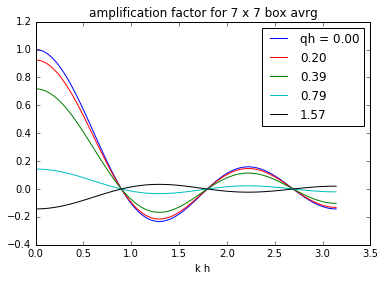

In [9]:
% matplotlib inline
from matplotlib import pylab
import numpy

kh = numpy.linspace(0., numpy.pi, 100)
qh = 0
M = 3 # 7x7 box

colors = ('b', 'r', 'g', 'c', 'k')
qhVals = (0.0, numpy.pi/16, numpy.pi/8, numpy.pi/4, numpy.pi/2.)
legs = ['{:.2f}'.format(qh) for qh in qhVals]
legs[0] = 'qh = ' + legs[0]
i = 0
for qh in qhVals:
    pylab.plot(kh, amplificationFactor(M, kh, qh), colors[i] + '-')
    i += 1
pylab.title('amplification factor for {} x {} box avrg'.format(2*M + 1, 2*M+1))
pylab.legend(legs, loc = 0)
pylab.xlabel('k h')


## Use Gaussian distribution for the weights

In [13]:
import numpy
def amplificationFactorGaussian(M, kh, qh):
    """
    Compute the amplification factor for the box averaging scheme -- all
    weights have the same value but the central value is missing
    
    M: halo depth (>= 1)
    kh: wavenumber * grid space in x direction, either 1d or 2d array
    qh: wavenumber * grid space in y direction, either 2d array or scalar

    Returns amplification factor
    """
    a = numpy.ones(kh.shape, kh.dtype)

    numCells = (2*M + 1)**2
    sigmaSquare = 2.0 * M**2 / 2.0
    
    sm = 1.0

    for m in range(1, M + 1):
        fact = numpy.exp(-m**2/sigmaSquare)
        a += 2 * fact * numpy.cos(m * qh)
        sm += 2 * fact
    
    for n in range(1, M + 1):
        fact = numpy.exp(-n**2/sigmaSquare)
        a += 2 * fact * numpy.cos(n * kh)
        sm += 2* fact
    
    for n in range(1, M + 1):
        for m in range(1, M + 1):
            fact = numpy.exp(-(m**2 + n**2)/sigmaSquare)
            a += 4 * fact * numpy.cos(n * kh) * numpy.cos(m * qh)
            sm += 4 * fact
        
    a /= sm
    
    return a


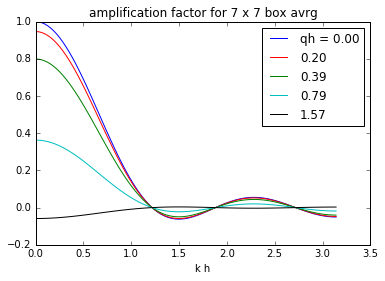

In [14]:
kh = numpy.linspace(0., numpy.pi, 100)
qh = 0
M = 3 # 7x7 box

colors = ('b', 'r', 'g', 'c', 'k')
qhVals = (0.0, numpy.pi/16, numpy.pi/8, numpy.pi/4, numpy.pi/2.)
legs = ['{:.2f}'.format(qh) for qh in qhVals]
legs[0] = 'qh = ' + legs[0]
i = 0
for qh in qhVals:
    pylab.plot(kh, amplificationFactorGaussian(M, kh, qh), colors[i] + '-')
    i += 1
pylab.title('amplification factor for {} x {} box avrg'.format(2*M + 1, 2*M+1))
pylab.legend(legs, loc = 0)
pylab.xlabel('k h')
